In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [49]:
input_train_data = pd.read_csv("train.csv")
input_test_data = pd.read_csv("test.csv")
submission = pd.read_csv("sample.csv")
input_train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [50]:
input_train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [51]:
target = input_train_data["is_promoted"]
input_train_data.drop(columns=["is_promoted", "employee_id"], axis=0, inplace=True)
input_test_data.drop(columns=["employee_id"], axis=0, inplace=True)
target.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [52]:
input_train_data.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [53]:
def missing_data_count(df):
  print(df.isna().sum())
missing_data_count(input_train_data)
missing_data_count(input_test_data)

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


In [54]:
bigdata = input_train_data.append(input_test_data, ignore_index=True)
print(bigdata["education"].value_counts())
input_train_data["education"] = input_train_data["education"].fillna("Bachelor's")
input_test_data["education"] = input_test_data["education"].fillna("Bachelor's")


print(bigdata["previous_year_rating"].value_counts())
input_train_data["previous_year_rating"] = input_train_data["previous_year_rating"].fillna(3.0)
input_test_data["previous_year_rating"] = input_test_data["previous_year_rating"].fillna(3.0)

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64
3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64


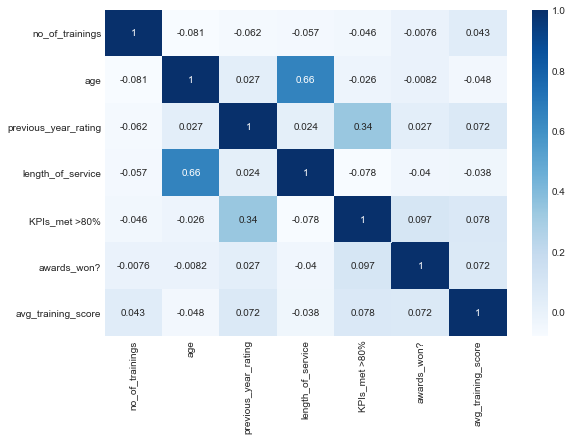

In [55]:
plt.figure(figsize=(9,6))
sns.heatmap(input_train_data.corr(),cmap='Blues',annot=True) 

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')


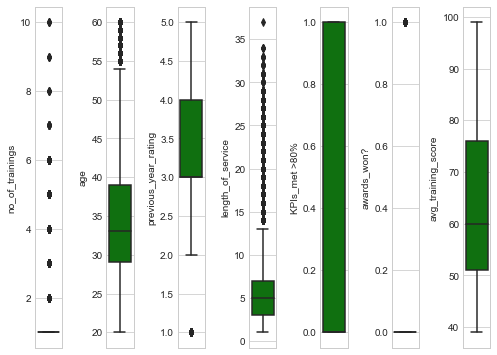

In [56]:
l = input_train_data.select_dtypes(include=[np.number]).columns
print(l)
number_of_columns=8
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(input_train_data[l[i]],color='green',orient='v')
    plt.tight_layout()

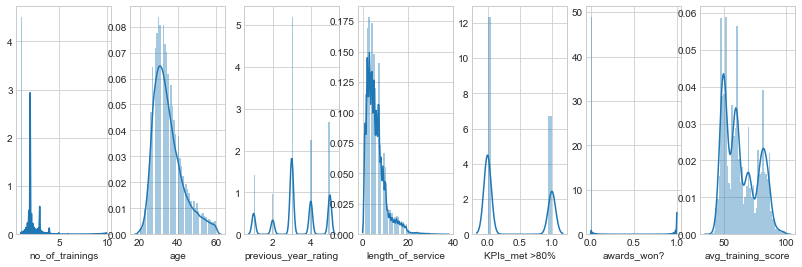

In [57]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(input_train_data[l[i]],kde=True) 

**no_of_trainings**

[ 1  2  3  4  7  5  6  8 10  9]


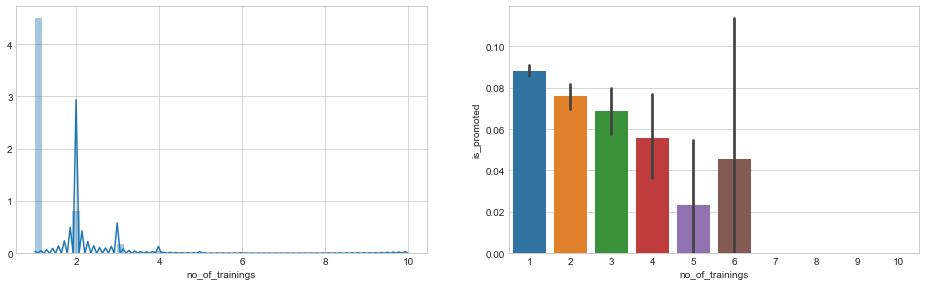

In [58]:
print(input_train_data["no_of_trainings"].unique())
plt.figure(figsize=(25,10))
plt.subplot(2, 3, 1)
sns.distplot(input_train_data["no_of_trainings"])
plt.subplot(2, 3, 2)
sns.barplot(input_train_data["no_of_trainings"], target)

In [59]:
input_train_data["no_of_trainings_promoted"] = input_train_data["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)
input_test_data["no_of_trainings_promoted"] = input_test_data["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)

In [ ]:
input_train_data["kpi_awards_trainingScore_promoted"] = input_train_data["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)
input_test_data["no_of_trainings_promoted"] = input_test_data["no_of_trainings"].apply(lambda x: 0 if x in [7, 8, 9, 10] else 1)

**age**

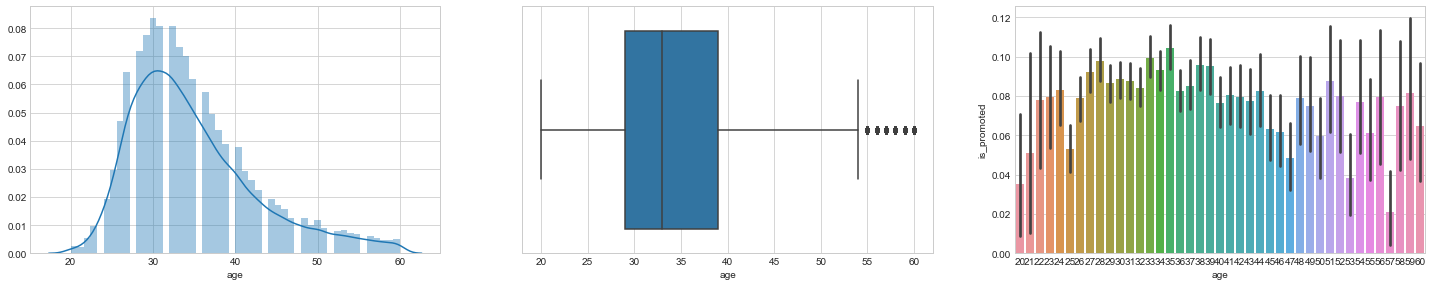

In [60]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(input_train_data["age"])
plt.subplot(2, 3, 2)
sns.boxplot(input_train_data["age"])
plt.subplot(2, 3, 3)
sns.barplot(input_train_data["age"], target)

In [61]:
# input_train_data["age"] = input_train_data["age"].apply(lambda x: 54 if x>54 else x)    # Outlier
# input_test_data["by ghage"] = input_test_data["age"].apply(lambda x: 54 if x>54 else x)
#grouping age into categories
def age_wrangler(row):
    if row['age'] >= 20 and row['age'] <= 25:
        return '20-25'
    elif row['age']  >= 26 and row['age'] <= 30:
        return '26-30'
    elif row['age'] >= 31 and row['age'] <= 35:
        return '31-35'
    elif row['age'] >= 36 and row['age'] <= 40:
        return '36-40'
    elif row['age'] >= 41 and row['age'] <= 45:
        return '41-45'
    elif row['age'] >= 46 and row['age'] <= 50:
        return '46-50'
    elif row['age'] >= 51 and row['age'] <= 55:
        return '51-55'
    elif row['age'] >= 56 and row['age'] <= 60:
        return '56-60'
    
input_train_data['age_cat'] = input_train_data.apply(lambda row: age_wrangler(row), axis=1)
input_test_data['age_cat'] = input_test_data.apply(lambda row: age_wrangler(row), axis=1)

input_train_data.groupby(['age_cat'])['age_cat'].count()

age_cat
20-25     3014
26-30    15104
31-35    16065
36-40     9963
41-45     5037
46-50     2773
51-55     1711
56-60     1141
Name: age_cat, dtype: int64

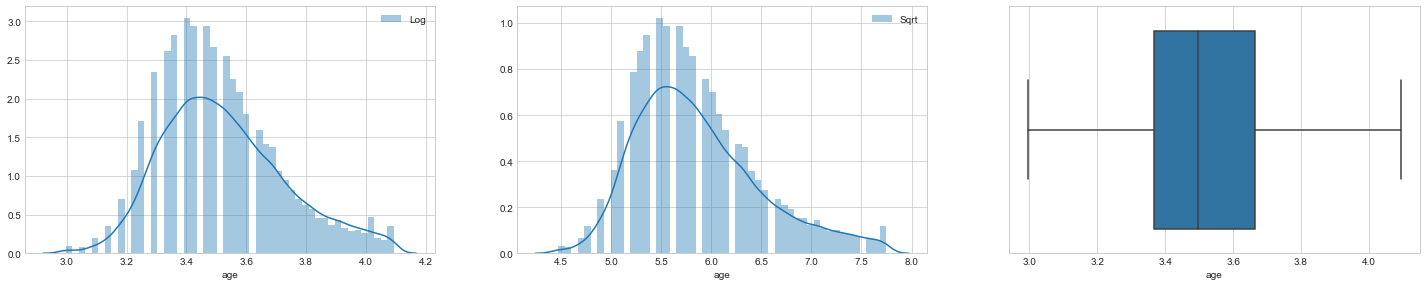

In [62]:
log = np.log(input_train_data["age"])
sqrt = np.power(input_train_data["age"], 1/2)
cube = np.power(input_train_data["age"], 1/3)
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(log, label="Log")
plt.legend(loc="best")
plt.subplot(2, 3, 2)
sns.distplot(sqrt, label="Sqrt")
plt.legend(loc="best")
plt.subplot(2, 3, 3)
sns.boxplot(log)

input_train_data["age_log"] = np.log(input_train_data["age"])
input_test_data["age_log"] = np.log(input_test_data["age"])

**length_of_service**

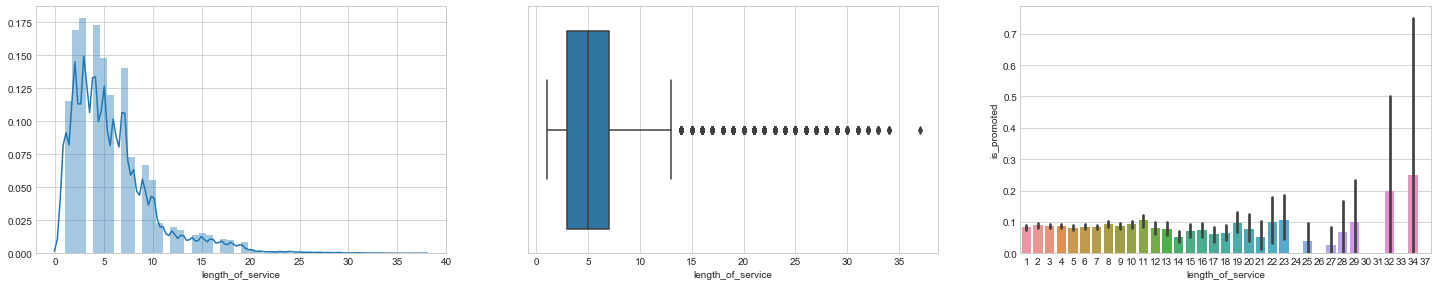

In [63]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(input_train_data["length_of_service"])
plt.subplot(2, 3, 2)
sns.boxplot(input_train_data["length_of_service"])
plt.subplot(2, 3, 3)
sns.barplot(input_train_data["length_of_service"], target)

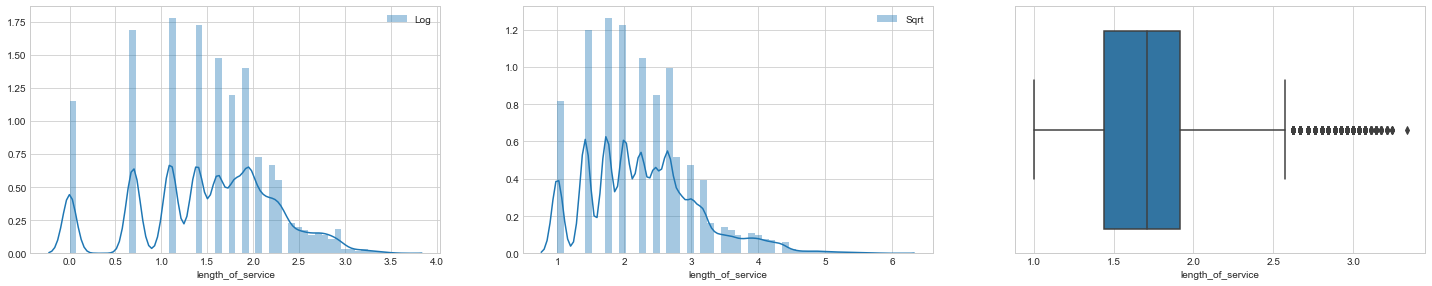

In [64]:
log = np.log(input_train_data["length_of_service"])
sqrt = np.power(input_train_data["length_of_service"], 1/2)
cube = np.power(input_train_data["length_of_service"], 1/3)
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(log, label="Log")
plt.legend(loc="best")
plt.subplot(2, 3, 2)
sns.distplot(sqrt, label="Sqrt")
plt.legend(loc="best")
plt.subplot(2, 3, 3)
sns.boxplot(cube)

In [65]:
input_train_data['length_of_service_log'] = np.log(input_train_data['length_of_service'])
input_test_data['length_of_service_log'] = np.log(input_test_data['length_of_service'])

In [66]:
# #grouping length_of_service into categories
# def length_of_service_wrangler(row):
#     if row['length_of_service'] >= 1 and row['length_of_service'] <= 5:
#         return '1-5'
#     elif row['length_of_service']  >= 6 and row['length_of_service'] <= 10:
#         return '6-10'
#     elif row['length_of_service'] >= 11 and row['length_of_service'] <= 15:
#         return '11-15'
#     elif row['length_of_service'] >= 16 and row['length_of_service'] <= 20:
#         return '16-20'
#     elif row['length_of_service'] >= 21 and row['length_of_service'] <= 25:
#         return '21-25'
#     elif row['length_of_service'] >= 26 and row['length_of_service'] <= 30:
#         return '26-30'
#     elif row['length_of_service'] >= 31: 
#         return 'Above30'

# input_train_data['length_of_service'] = input_train_data.apply(lambda row: length_of_service_wrangler(row), axis=1)
# input_test_data['length_of_service'] = input_test_data.apply(lambda row: length_of_service_wrangler(row), axis=1)

# input_train_data.groupby(['length_of_service'])['length_of_service'].count()

**diff_age_service**

In [67]:
input_train_data['diff_age_service'] = (input_train_data['age'] - input_train_data['length_of_service'])/input_train_data['age']
input_test_data['diff_age_service'] = (input_test_data['age'] - input_test_data['length_of_service'])/input_test_data['age']

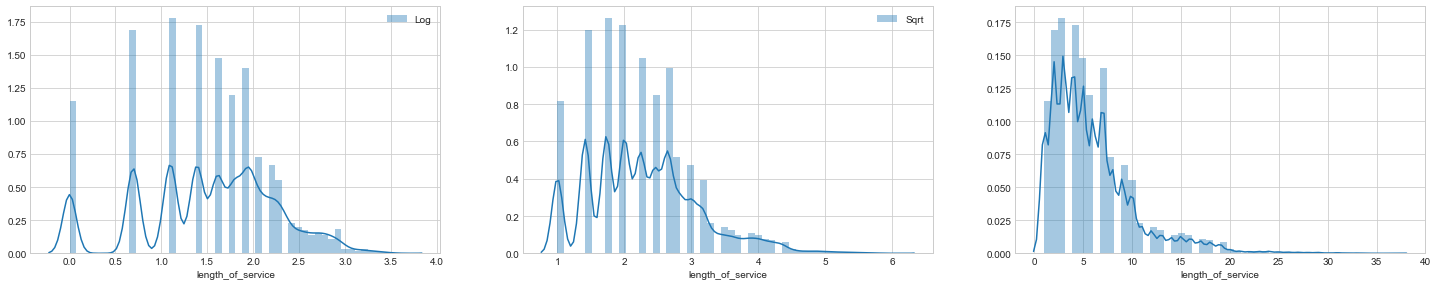

In [68]:
log = np.log(input_train_data["length_of_service"])
sqrt = np.power(input_train_data["length_of_service"], 1/2)
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(log, label="Log")
plt.legend(loc="best")
plt.subplot(2, 3, 2)
sns.distplot(sqrt, label="Sqrt")
plt.legend(loc="best")
plt.subplot(2, 3, 3)
sns.distplot(input_train_data["length_of_service"])

**KPIs_met >80%**

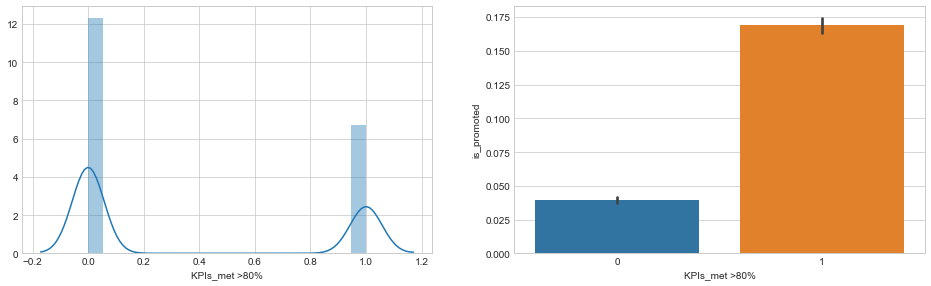

In [69]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(input_train_data["KPIs_met >80%"])
plt.subplot(2, 3, 2)
sns.barplot(input_train_data["KPIs_met >80%"], target)

**awards_won?**

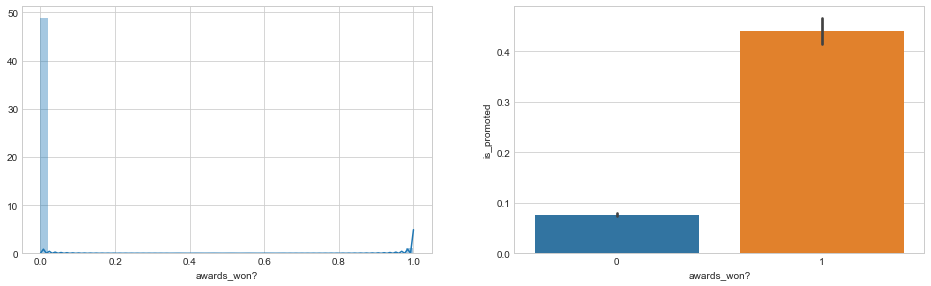

In [70]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(input_train_data["awards_won?"])
plt.subplot(2, 3, 2)
sns.barplot(input_train_data["awards_won?"], target)

**avg_training_score**

[Text(0,0,'39'),
 Text(0,0,'40'),
 Text(0,0,'41'),
 Text(0,0,'42'),
 Text(0,0,'43'),
 Text(0,0,'44'),
 Text(0,0,'45'),
 Text(0,0,'46'),
 Text(0,0,'47'),
 Text(0,0,'48'),
 Text(0,0,'49'),
 Text(0,0,'50'),
 Text(0,0,'51'),
 Text(0,0,'52'),
 Text(0,0,'53'),
 Text(0,0,'54'),
 Text(0,0,'55'),
 Text(0,0,'56'),
 Text(0,0,'57'),
 Text(0,0,'58'),
 Text(0,0,'59'),
 Text(0,0,'60'),
 Text(0,0,'61'),
 Text(0,0,'62'),
 Text(0,0,'63'),
 Text(0,0,'64'),
 Text(0,0,'65'),
 Text(0,0,'66'),
 Text(0,0,'67'),
 Text(0,0,'68'),
 Text(0,0,'69'),
 Text(0,0,'70'),
 Text(0,0,'71'),
 Text(0,0,'72'),
 Text(0,0,'73'),
 Text(0,0,'74'),
 Text(0,0,'75'),
 Text(0,0,'76'),
 Text(0,0,'77'),
 Text(0,0,'78'),
 Text(0,0,'79'),
 Text(0,0,'80'),
 Text(0,0,'81'),
 Text(0,0,'82'),
 Text(0,0,'83'),
 Text(0,0,'84'),
 Text(0,0,'85'),
 Text(0,0,'86'),
 Text(0,0,'87'),
 Text(0,0,'88'),
 Text(0,0,'89'),
 Text(0,0,'90'),
 Text(0,0,'91'),
 Text(0,0,'92'),
 Text(0,0,'93'),
 Text(0,0,'94'),
 Text(0,0,'95'),
 Text(0,0,'96'),
 Text(0,0,'97'

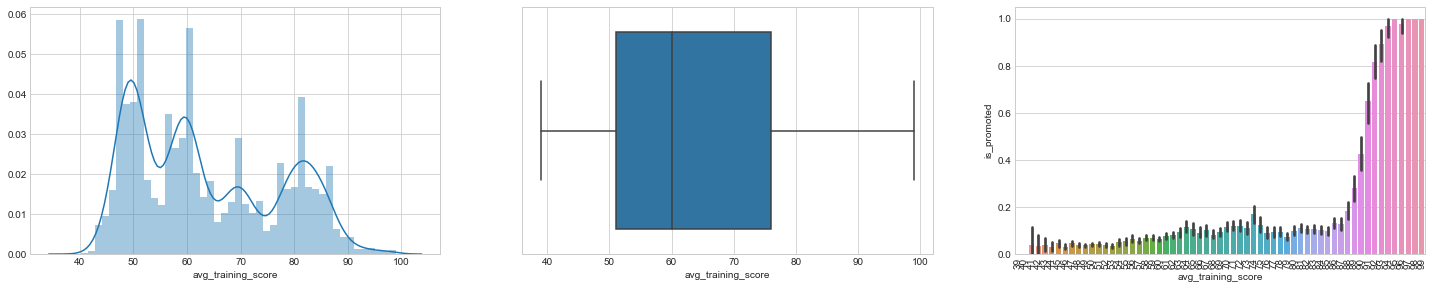

In [71]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(input_train_data["avg_training_score"])
plt.subplot(2, 3, 2)
sns.boxplot(input_train_data["avg_training_score"])
plt.subplot(2, 3, 3)
g = sns.barplot(input_train_data["avg_training_score"], target)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

avg_training_score >=90 have great chances of promotion

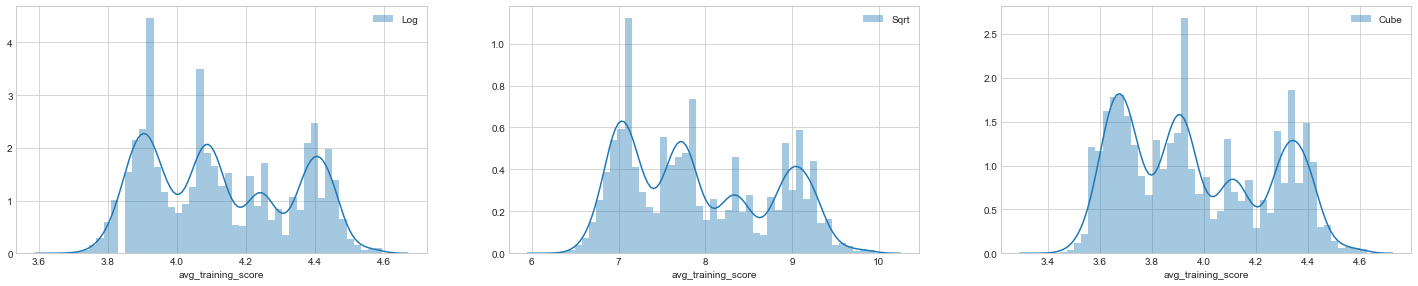

In [72]:
log = np.log(input_train_data["avg_training_score"])
sqrt = np.power(input_train_data["avg_training_score"], 1/2)
cube = np.power(input_train_data["avg_training_score"], 1/3)
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
sns.distplot(log, label="Log")
plt.legend(loc="best")
plt.subplot(2, 3, 2)
sns.distplot(sqrt, label="Sqrt")
plt.legend(loc="best")
plt.subplot(2, 3, 3)
sns.distplot(cube, label="Cube")
plt.legend(loc="best")

In [73]:
input_train_data["avg_training_score_promoted"] = input_train_data["avg_training_score"].apply(lambda x: 1 if x>=90 else 0)
input_test_data["avg_training_score_promoted"] = input_test_data["avg_training_score"].apply(lambda x: 1 if x>=90 else 0)

input_train_data["avg_training_score_log"] = np.log(input_train_data["avg_training_score"])
input_test_data["avg_training_score_log"] = np.log(input_test_data["avg_training_score"])

### department

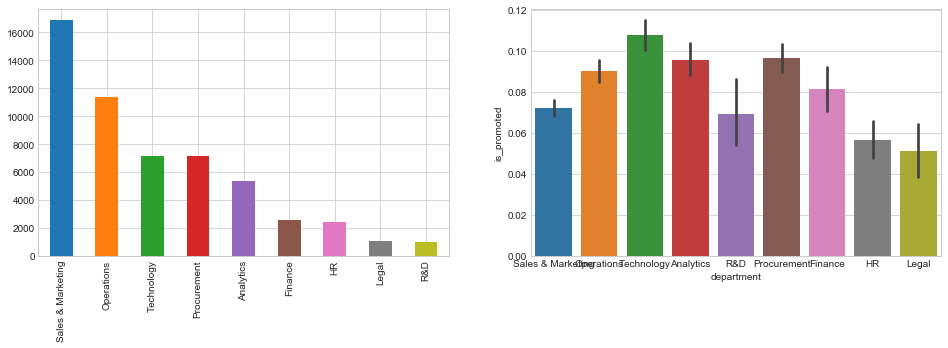

In [74]:
plt.figure(figsize=(25,10))
plt.subplot(2, 3, 1)
input_train_data["department"].value_counts().plot('bar')
plt.subplot(2, 3, 2)
sns.barplot(input_train_data["department"], target)

### region

[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20'),
 Text(0,0,'21'),
 Text(0,0,'22'),
 Text(0,0,'23'),
 Text(0,0,'24'),
 Text(0,0,'25'),
 Text(0,0,'26'),
 Text(0,0,'27'),
 Text(0,0,'28'),
 Text(0,0,'29'),
 Text(0,0,'30'),
 Text(0,0,'31'),
 Text(0,0,'32'),
 Text(0,0,'33'),
 Text(0,0,'34')]

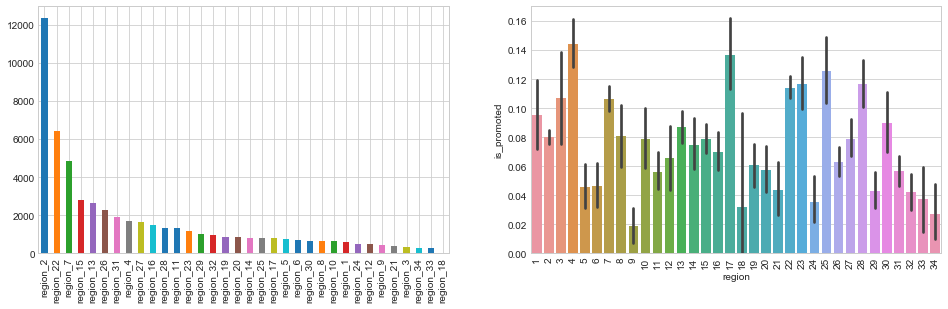

In [75]:
plt.figure(figsize=(25,10))
plt.subplot(2, 3, 1)
input_train_data["region"].value_counts().plot('bar')
plt.subplot(2, 3, 2)
temp = input_train_data["region"].apply(lambda x: int(x.split('_')[1]))
g = sns.barplot(temp.sort_values(), target)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [76]:
pd.crosstab(input_train_data["region"], target).apply(lambda r: r/r.sum(), axis=1)[1].sort_values()

region
region_9     0.019048
region_34    0.027397
region_18    0.032258
region_24    0.035433
region_33    0.037175
region_32    0.042328
region_29    0.043260
region_21    0.043796
region_5     0.045692
region_6     0.046377
region_11    0.056274
region_31    0.056848
region_20    0.057647
region_19    0.060641
region_26    0.063274
region_12    0.066000
region_16    0.069625
region_14    0.074970
region_10    0.078704
region_27    0.078963
region_15    0.079060
region_2     0.080126
region_8     0.080916
region_13    0.086858
region_30    0.089802
region_1     0.095082
region_7     0.106546
region_3     0.106936
region_22    0.114188
region_23    0.116596
region_28    0.116844
region_25    0.125763
region_17    0.136935
region_4     0.144451
Name: 1, dtype: float64

Region are categoried as per region number. Try doing by promotion %

In [77]:
#grouping regions into categories
def region_wrangler(row):
    if row['region'] >= 1 and row['region'] <= 10:
        return '1to10'
    elif row['region'] >= 11 and row['region'] <= 20:
        return '11to20'
    elif row['region'] >= 21 and row['region'] <= 30:
        return '21to30'
    elif row['region'] >= 31 and row['region'] <= 40:
        return '31to40'
    
    
#cleaning region's names and storing only numbers 
input_train_data['region']=input_train_data['region'].str.split("_").str[1].astype('int64')
input_test_data['region']=input_test_data['region'].str.split("_").str[1].astype('int64')

input_train_data['region'] = input_train_data.apply(lambda row: region_wrangler(row), axis=1)
input_test_data['region'] = input_test_data.apply(lambda row: region_wrangler(row), axis=1)

input_train_data.groupby(['region'])['region'].count()

region
11to20    12114
1to10     23024
21to30    16229
31to40     3441
Name: region, dtype: int64

**education**

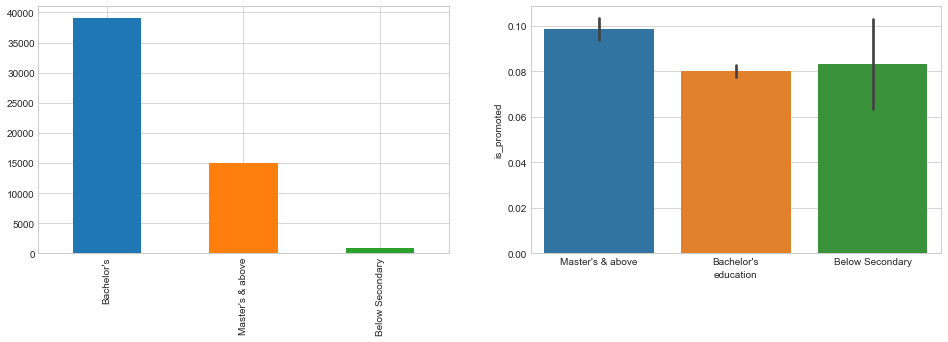

In [78]:
plt.figure(figsize=(25,10))
plt.subplot(2, 3, 1)
input_train_data["education"].value_counts().plot('bar')
plt.subplot(2, 3, 2)
sns.barplot(input_train_data["education"], target)

**gender**

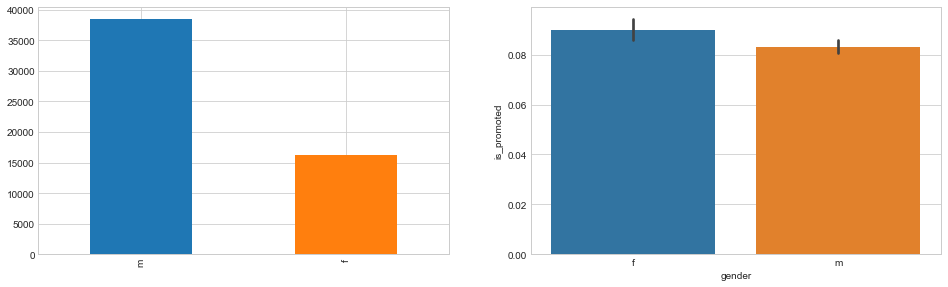

In [79]:
plt.figure(figsize=(25,10))
plt.subplot(2, 3, 1)
input_train_data["gender"].value_counts().plot('bar')
plt.subplot(2, 3, 2)
sns.barplot(input_train_data["gender"], target)

**recruitment_channel**

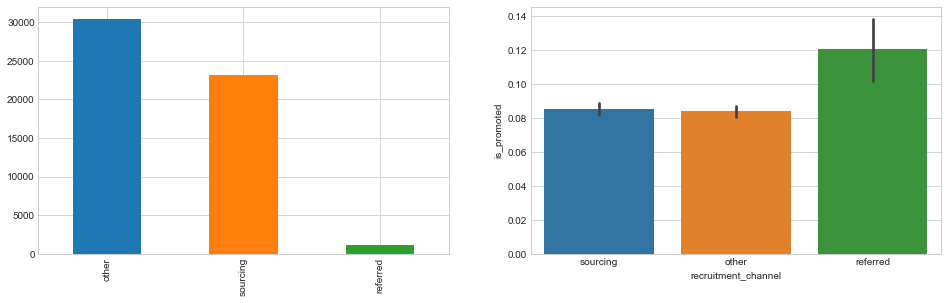

In [80]:
plt.figure(figsize=(25,10))
plt.subplot(2, 3, 1)
input_train_data["recruitment_channel"].value_counts().plot('bar')
plt.subplot(2, 3, 2)
sns.barplot(input_train_data["recruitment_channel"], target)

In [81]:
input_train_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,no_of_trainings_promoted,age_cat,age_log,length_of_service_log,diff_age_service,avg_training_score_promoted,avg_training_score_log
0,Sales & Marketing,1to10,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,1,31-35,3.555348,2.079442,0.771429,0,3.891820
1,Operations,21to30,Bachelor's,m,other,1,30,5.0,4,0,0,60,1,26-30,3.401197,1.386294,0.866667,0,4.094345
2,Sales & Marketing,11to20,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,1,31-35,3.526361,1.945910,0.794118,0,3.912023
3,Sales & Marketing,21to30,Bachelor's,m,other,2,39,1.0,10,0,0,50,1,36-40,3.663562,2.302585,0.743590,0,3.912023
4,Technology,21to30,Bachelor's,m,other,1,45,3.0,2,0,0,73,1,41-45,3.806662,0.693147,0.955556,0,4.290459


In [82]:
input_train_data.drop(["age", "length_of_service"], axis=1, inplace=True)
input_test_data.drop(["age", "length_of_service"], axis=1, inplace=True)

In [83]:
train = pd.get_dummies(input_train_data)
test = pd.get_dummies(input_test_data)

In [84]:
print(train.shape)
print(test.shape)

(54808, 40)
(23490, 40)


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 40 columns):
no_of_trainings                 54808 non-null int64
previous_year_rating            54808 non-null float64
KPIs_met >80%                   54808 non-null int64
awards_won?                     54808 non-null int64
avg_training_score              54808 non-null int64
no_of_trainings_promoted        54808 non-null int64
age_log                         54808 non-null float64
length_of_service_log           54808 non-null float64
diff_age_service                54808 non-null float64
avg_training_score_promoted     54808 non-null int64
avg_training_score_log          54808 non-null float64
department_Analytics            54808 non-null uint8
department_Finance              54808 non-null uint8
department_HR                   54808 non-null uint8
department_Legal                54808 non-null uint8
department_Operations           54808 non-null uint8
department_Procurement          5

In [86]:
from sklearn.metrics import f1_score
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [87]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.33, random_state=42)

In [88]:
clf = xgb.XGBClassifier( n_estimators=600, eta=0.01, learning_rate=0.05, max_depth=8, min_samples_leaf=75, reg_lambda=10 ,scale_pos_weight = 1, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
f1_score(y_test, pred)

0.5146771037181996

last : 5146 GB n_estimators=600, eta=0.01, learning_rate=0.05, max_depth=8, min_samples_leaf=75, reg_lambda=10 ,scale_pos_weight = 1, n_jobs=-1, random_state=42

In [89]:
clf = xgb.XGBClassifier(n_estimators=600, eta=0.01, learning_rate=0.05, max_depth=8, min_samples_leaf=75, reg_lambda=10 ,scale_pos_weight = 1, n_jobs=-1)
clf.fit(train, target)
pred = clf.predict(test)

In [97]:
#GradientBoosting Classifier

from sklearn.ensemble import GradientBoostingClassifier


def GradientBoostingClassifier_model(X_train, X_test, y_train, y_test):
    if __name__ == '__main__':
        
        
        gb = GradientBoostingClassifier()
        
        parameters = {'learning_rate': [0.01],
                      'max_depth': [5],
                      'min_samples_leaf': [16],
                      'max_features': [1.0],
                      'n_estimators': [200]}
        
        estimator = GridSearchCV(gb,n_jobs=-1,param_grid=parameters)
        
        estimator.fit(X_train, y_train)
        
        prediction_test_gb=estimator.predict(X_test)
        prediction_train_gb=estimator.predict(X_train)
        
        best_params = estimator.best_params_
                                 
        validation_accuracy_test = f1_score(y_test, prediction_test_gb)
        validation_accuracy_train = f1_score(y_train, prediction_train_gb)
        
        print('Validation accuracy_test: ', validation_accuracy_test)
        print('Validation accuracy_train: ', validation_accuracy_train)
        print(best_params)

In [98]:
GradientBoostingClassifier_model(X_train, X_test, y_train, y_test)

Validation accuracy_test:  0.5093525179856115
Validation accuracy_train:  0.6286201022146508
{'learning_rate': 0.05, 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 75, 'n_estimators': 600}


In [92]:
#GradientBoosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
        
        
gb = GradientBoostingClassifier()

parameters = {'learning_rate': [0.1],
              'max_depth': [5],
              'min_samples_leaf': [16],
              'max_features': [1.0],
              'n_estimators': [200]}

estimator = GridSearchCV(gb,n_jobs=-1,param_grid=parameters)

estimator.fit(train, target)

prediction_test_gb=estimator.predict(test)

In [93]:
print(prediction_test_gb.shape)
submission["is_promoted"].shape

(23490,)


(23490,)

In [94]:
submission["is_promoted"]=prediction_test_gb
submission.to_csv("wns_submission.csv", index=False)
#from google.colab import files
#files.download("wns_submission.csv")

In [99]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


<a href="#region">Goto region</a>